# C17442074 Mark Higgins

### Visualising Data Assignment 2021
This is my submission for the Visualising Data Assignment in TU Dublin 2020/2021 academic year. DT282/4.

The goal was to find a dataset, explore the data and plot charts to tell a story about the data to an audience.

### The Dataset
The dataset used was the Data Science for COVID-19 (DS4C) dataset on Kaggle. It is an analysis of COVID-19 data for South Korea in 2020. The source of the data was the KCDC (Korea Centers for Disease Control & Prevention). South Korea is known for handling the pandemic well, stopping virus transmission better than any other wealthy country in the early months of the pandemic (Source: https://www.wsj.com/articles/lessons-from-south-korea-on-how-to-manage-covid-11601044329). 

Unfortunately, it has not been kept up-to-date, with the last case from 30th June 2020, where total cases reached 12,800 confirmed cases. Still, the data is comprehensive and does show how South Korea was affected by COVID-19 in the early stages. 

**Link to dataset:** https://www.kaggle.com/kimjihoo/coronavirusdataset

### Why It Was Picked
It contains **Continuous Numeric, Categorical** and **Temporal** data across the multiple CSV files with 5000+ rows in the PatientInfo.csv file alone. There is also location data in the form of latitude and longitude coordinates and text data. There are more than 8 attributes across the files.

**N.B.** Did not merge any of the files as it would be too complex to do so due to varying column names. 

In [1]:
library(tidyverse)
library(sqldf)
library(lubridate)
library(ggthemes)
library(dplyr)
library(viridis)
library("GGally")

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.5
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks sta

## 1. Examining Dataset
The dataset are comprised of multiple CSV files that are stored in a folder called **data**. Not all from the dataset are used, just the ones that are most relevant for telling the story: Case, Region, Patient and Time data. This section covers a brief analysis of the metadata of the dataset, file by file. Some columns may be renamed for clarity.

The CSV files were read and converted into dataframes. The strings were not converted into factors as it would be necessary to explore the full data without it being converted into numbers first. 

In [2]:
# Dataframes for the CSV files
cases_df = read.csv('./data/Case.csv', stringsAsFactors = FALSE)
regions_df = read.csv('./data/Region.csv', stringsAsFactors = FALSE)
patients_df = read.csv('./data/PatientInfo.csv', stringsAsFactors = FALSE)
time_df = read.csv('./data/Time.csv', stringsAsFactors = FALSE)

# Changes blank values to NA
patients_df <- patients_df %>% mutate_all(na_if,"")

### 1.1. Cases Dataframe
The cases dataframe is comprised of 174 rows with 8 columns consisting of both qualitative, quantitative and location data. It provides data on COVID-19 cases, including the city and province the case was in, if it was a group infection or not, the way of infection, confirmed cases and location data. While examining this file on Kaggle, there were no missing values. Every value for every column was valid.

Renaming 2 of the columns just for clarity so it shows what they are representing more clearly.

In [3]:
colnames(cases_df)[which(names(cases_df) == "group")] <- "group_infection"
colnames(cases_df)[which(names(cases_df) == "confirmed")] <- "confirmed_cases"

As can be seen, there are 8 attributes where province, city and infection_case are qualitative and confirmed_cases is quantitative. 

In [4]:
head(cases_df)

str(cases_df)

,case_id,province,city,group_infection,infection_case,confirmed_cases,latitude,longitude
,<int>,<chr>,<chr>,<lgl>,<chr>,<int>,<chr>,<chr>
1,1000001,Seoul,Yongsan-gu,TRUE,Itaewon Clubs,139,37.538621,126.992652
2,1000002,Seoul,Gwanak-gu,TRUE,Richway,119,37.48208,126.901384
3,1000003,Seoul,Guro-gu,TRUE,Guro-gu Call Center,95,37.508163,126.884387
4,1000004,Seoul,Yangcheon-gu,TRUE,Yangcheon Table Tennis Club,43,37.546061,126.874209
5,1000005,Seoul,Dobong-gu,TRUE,Day Care Center,43,37.679422,127.044374
6,1000006,Seoul,Guro-gu,TRUE,Manmin Central Church,41,37.481059,126.894343


'data.frame':	174 obs. of  8 variables:
 $ case_id        : int  1000001 1000002 1000003 1000004 1000005 1000006 1000007 1000008 1000009 1000010 ...
 $ province       : chr  "Seoul" "Seoul" "Seoul" "Seoul" ...
 $ city           : chr  "Yongsan-gu" "Gwanak-gu" "Guro-gu" "Yangcheon-gu" ...
 $ group_infection: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ infection_case : chr  "Itaewon Clubs" "Richway" "Guro-gu Call Center" "Yangcheon Table Tennis Club" ...
 $ confirmed_cases: int  139 119 95 43 43 41 36 17 25 30 ...
 $ latitude       : chr  "37.538621" "37.48208" "37.508163" "37.546061" ...
 $ longitude      : chr  "126.992652" "126.901384" "126.884387" "126.874209" ...


In [5]:
head(patients_df)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1e+09,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NA,75,2020-01-22,2020-01-23,2020-02-05,NA,released
2,1e+09,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NA,31,NA,2020-01-30,2020-03-02,NA,released
3,1e+09,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NA,2020-01-30,2020-02-19,NA,released
4,1e+09,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NA,9,2020-01-26,2020-01-30,2020-02-15,NA,released
5,1e+09,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NA,2020-01-31,2020-02-24,NA,released
6,1e+09,female,50s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,43,NA,2020-01-31,2020-02-19,NA,released


In [6]:
head(regions_df)

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,10000,Seoul,Seoul,37.56695,126.9780,607,830,48,1.44,15.38,5.8,22739
2,10010,Seoul,Gangnam-gu,37.51842,127.0472,33,38,0,4.18,13.17,4.3,3088
3,10020,Seoul,Gangdong-gu,37.53049,127.1238,27,32,0,1.54,14.55,5.4,1023
4,10030,Seoul,Gangbuk-gu,37.63994,127.0255,14,21,0,0.67,19.49,8.5,628
5,10040,Seoul,Gangseo-gu,37.55117,126.8495,36,56,1,1.17,14.39,5.7,1080
6,10050,Seoul,Gwanak-gu,37.47829,126.9515,22,33,1,0.89,15.12,4.9,909


### 1.2. Regions Dataframe
The region dataframe is comprised of 244 rows and 12 columns, consisting of qualitative, quantitative and location data, but mainly quantitative. It provides data on 18 provinces within South Korea, such as province, city, number of schools, universities, elderly people and so on. There were no missing files when the file was checked on Kaggle.

Again, renaming the code column to province_code for clarity.

In [7]:
colnames(regions_df)[which(names(regions_df) == "code")] <- "province_code"

Its clear to see that that there is mostly quantitative data in the file, with some qualitative data. 

In [8]:
head(regions_df)

str(regions_df)

,province_code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,10000,Seoul,Seoul,37.56695,126.9780,607,830,48,1.44,15.38,5.8,22739
2,10010,Seoul,Gangnam-gu,37.51842,127.0472,33,38,0,4.18,13.17,4.3,3088
3,10020,Seoul,Gangdong-gu,37.53049,127.1238,27,32,0,1.54,14.55,5.4,1023
4,10030,Seoul,Gangbuk-gu,37.63994,127.0255,14,21,0,0.67,19.49,8.5,628
5,10040,Seoul,Gangseo-gu,37.55117,126.8495,36,56,1,1.17,14.39,5.7,1080
6,10050,Seoul,Gwanak-gu,37.47829,126.9515,22,33,1,0.89,15.12,4.9,909


'data.frame':	244 obs. of  12 variables:
 $ province_code           : int  10000 10010 10020 10030 10040 10050 10060 10070 10080 10090 ...
 $ province                : chr  "Seoul" "Seoul" "Seoul" "Seoul" ...
 $ city                    : chr  "Seoul" "Gangnam-gu" "Gangdong-gu" "Gangbuk-gu" ...
 $ latitude                : num  37.6 37.5 37.5 37.6 37.6 ...
 $ longitude               : num  127 127 127 127 127 ...
 $ elementary_school_count : int  607 33 27 14 36 22 22 26 18 42 ...
 $ kindergarten_count      : int  830 38 32 21 56 33 33 34 19 66 ...
 $ university_count        : int  48 0 0 0 1 1 3 3 0 6 ...
 $ academy_ratio           : num  1.44 4.18 1.54 0.67 1.17 0.89 1.16 1 0.96 1.39 ...
 $ elderly_population_ratio: num  15.4 13.2 14.6 19.5 14.4 ...
 $ elderly_alone_ratio     : num  5.8 4.3 5.4 8.5 5.7 4.9 4.8 5.7 6.7 7.4 ...
 $ nursing_home_count      : int  22739 3088 1023 628 1080 909 723 741 475 952 ...


Out of curiosity, the provinces and the amount of them from the dataset were printed out below.

In [9]:
print(sqldf('select distinct(province) from regions_df'))

no_of_provinces <- sqldf('select count(distinct(province)) from regions_df')

print(paste('Number of provinces: ', no_of_provinces))

            province
1              Seoul
2              Busan
3              Daegu
4            Gwangju
5            Incheon
6            Daejeon
7              Ulsan
8             Sejong
9        Gyeonggi-do
10        Gangwon-do
11 Chungcheongbuk-do
12 Chungcheongnam-do
13      Jeollabuk-do
14      Jeollanam-do
15  Gyeongsangbuk-do
16  Gyeongsangnam-do
17           Jeju-do
18             Korea
[1] "Number of provinces:  18"


### 1.3. Patients Dataframe
The patients dataframe is comprised of 5165 rows and 14 columns, each row representing a patient and data about themselves, like sex, age, country, how they were infected, who were they infected by (if available), amount of people they were in contact with when their symptoms started, when it was confirmed and when they were released etc. 

There are lot of missing values in this dataframe, particularly for the infected_by and symptom_onset_date columns. This makes sense as it would not be feasible to know who infected each patient and it would not be easy to obtain an accurate date for when the symptoms started for each patient. To combat this, the missing values will be converted to NA and added into a chart showing how many values are unknown, rather than just dropping them outright.

In [10]:
head(patients_df)

str(patients_df)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1e+09,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NA,75,2020-01-22,2020-01-23,2020-02-05,NA,released
2,1e+09,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NA,31,NA,2020-01-30,2020-03-02,NA,released
3,1e+09,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NA,2020-01-30,2020-02-19,NA,released
4,1e+09,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NA,9,2020-01-26,2020-01-30,2020-02-15,NA,released
5,1e+09,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NA,2020-01-31,2020-02-24,NA,released
6,1e+09,female,50s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,43,NA,2020-01-31,2020-02-19,NA,released


'data.frame':	5165 obs. of  14 variables:
 $ patient_id        : num  1e+09 1e+09 1e+09 1e+09 1e+09 ...
 $ sex               : chr  "male" "male" "male" "male" ...
 $ age               : chr  "50s" "30s" "50s" "20s" ...
 $ country           : chr  "Korea" "Korea" "Korea" "Korea" ...
 $ province          : chr  "Seoul" "Seoul" "Seoul" "Seoul" ...
 $ city              : chr  "Gangseo-gu" "Jungnang-gu" "Jongno-gu" "Mapo-gu" ...
 $ infection_case    : chr  "overseas inflow" "overseas inflow" "contact with patient" "overseas inflow" ...
 $ infected_by       : chr  NA NA "2002000001" NA ...
 $ contact_number    : chr  "75" "31" "17" "9" ...
 $ symptom_onset_date: chr  "2020-01-22" NA NA "2020-01-26" ...
 $ confirmed_date    : chr  "2020-01-23" "2020-01-30" "2020-01-30" "2020-01-30" ...
 $ released_date     : chr  "2020-02-05" "2020-03-02" "2020-02-19" "2020-02-15" ...
 $ deceased_date     : chr  NA NA NA NA ...
 $ state             : chr  "released" "released" "released" "released" ...


## 2. Exploring Data
This section will go over actually generating some charts to show the distributions across the data and correlations between attributes to get a better sense of what we're looking at and how the data can be used properly.

### 2.1. Distribution of Data

To get a sense of what the distribution of some of the data is like, I have plotted a histogram, density plot and box plot for continuous data. Most of the continuous attributes are located in the Region.csv file so that is the file I will focus on. 

In [11]:
# head(regions_df)

**Histogram for Elderly People Ratio**

Plotting a histogram to show the distribution of elderly people, by their ratios. The data gives the ratio of elderly people to the rest of the population many cities within regions in South Korea. This histogram shows how often these ratios appear.

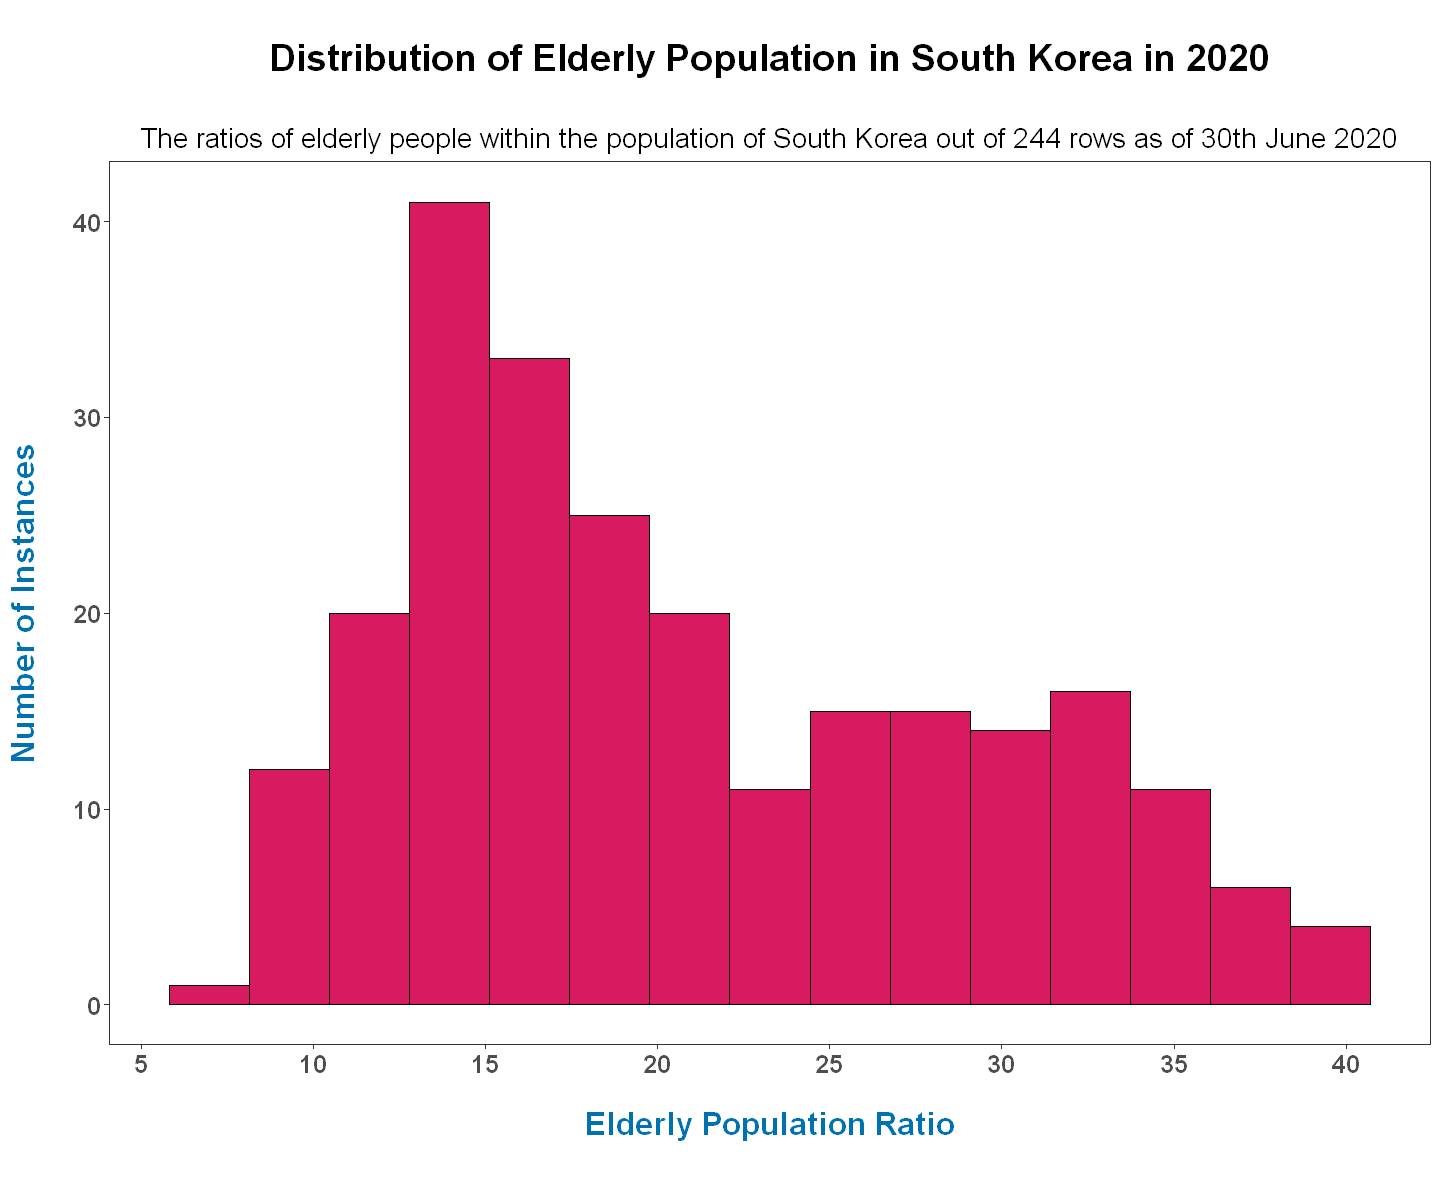

In [12]:
options(repr.plot.width=12, repr.plot.height=10)

elderly_hist <- ggplot(regions_df, aes(x=elderly_population_ratio))

elderly_hist + geom_histogram(bins=15, color="black", fill="#D81B60") +

scale_x_continuous(breaks = seq(0, 50, by = 5)) +

scale_y_continuous(breaks = seq(0, 100, by = 10)) +

labs(title='Distribution of Elderly Population in South Korea in 2020',
     subtitle='The ratios of elderly people within the population of South Korea out of 244 rows as of 30th June 2020',
     x='Elderly Population Ratio',
     y='Number of Instances') +

theme_bw() +

theme(plot.title = element_text(size=22, face="bold", lineheight=1.5, margin=margin(20, 10, 30, 0), hjust=0.5),
      plot.subtitle = element_text(size=17, lineheight=1.5, hjust=0.5),
      axis.title.x = element_text(size=19, margin=margin(20, 0, 30, 0), color="#0072b2", face="bold"),
      axis.title.y = element_text(size=19, margin=margin(0, 20, 0, 0), color="#0072b2", face="bold"),
      axis.text.x = element_text(size=15, face="bold"),
      axis.text.y = element_text(size=15, face="bold"),
      legend.position="none",
      panel.grid.major = element_blank(), panel.grid.minor = element_blank()
     )

**Density Plot for Elderly People Living Alone Ratio**

The chart below shows the distribution of the ratios of elderly people living alone. The ratio is to total elderly people. It peaks at a ratio between 5 - 10 so for every 7 or so elderly people, theres 1 living alone. 

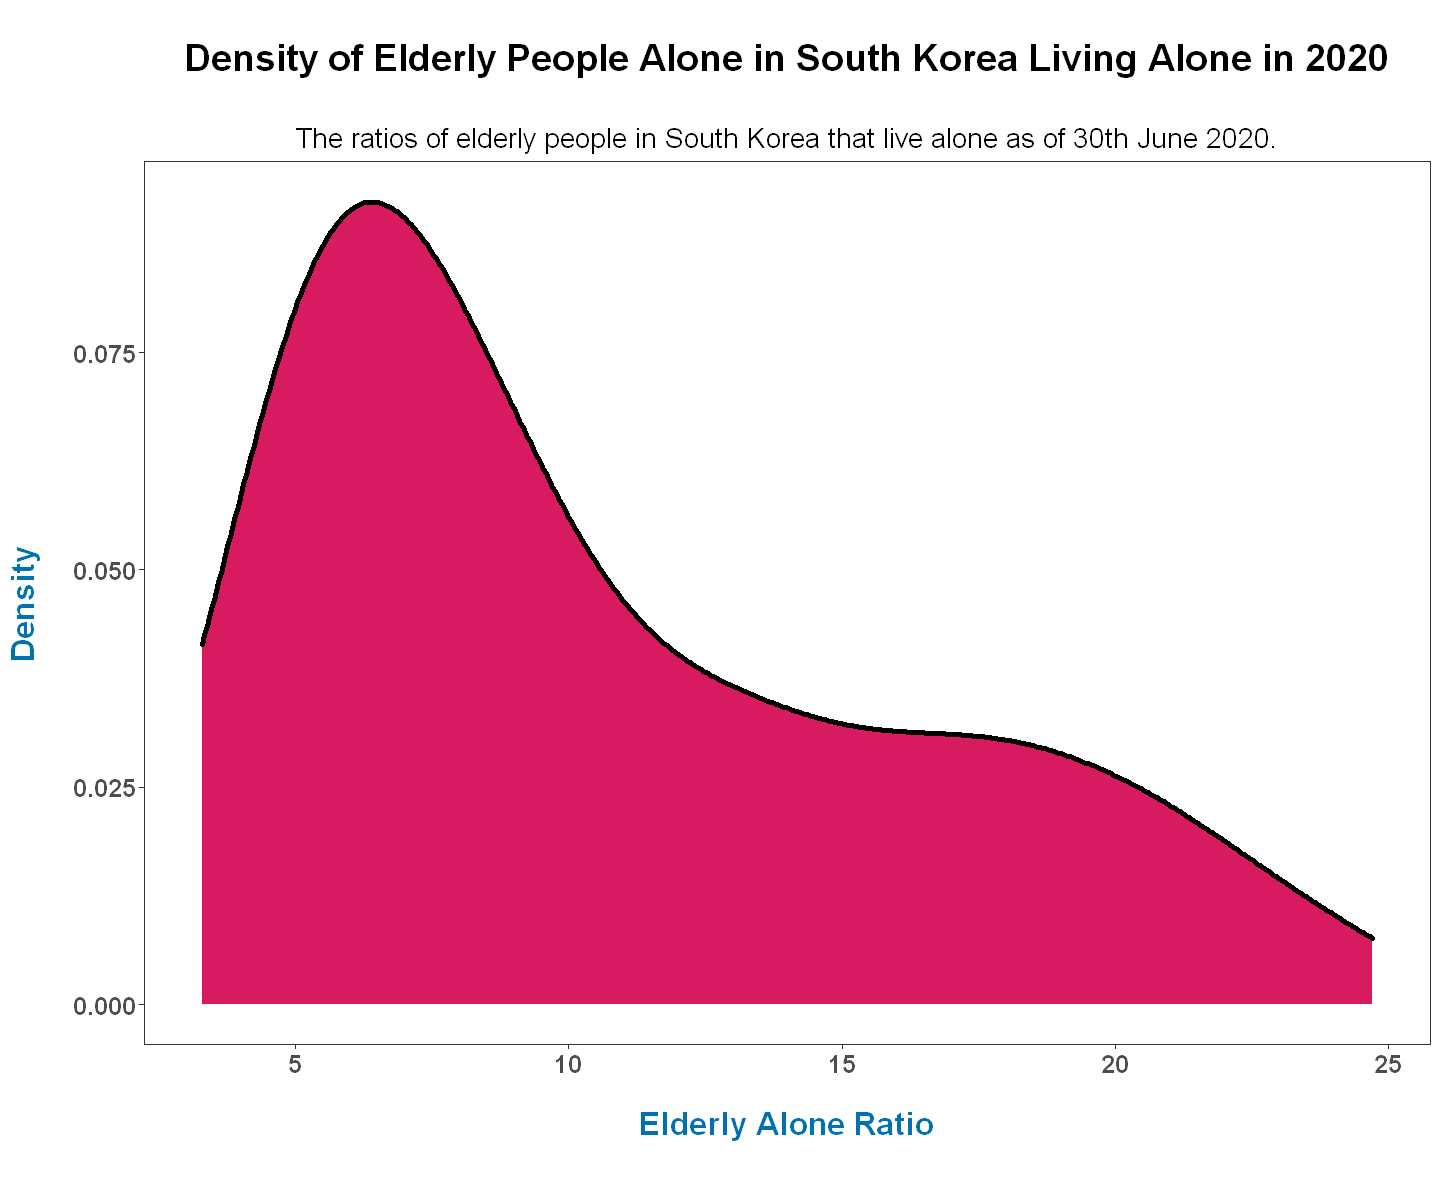

In [13]:
elderly_alone_density <- ggplot(regions_df, aes(x=elderly_alone_ratio)) 

elderly_alone_density + geom_density(fill="#D81B60", size=1.5) +

labs(title='Density of Elderly People Alone in South Korea Living Alone in 2020',
     subtitle='The ratios of elderly people in South Korea that live alone as of 30th June 2020.',
     x='Elderly Alone Ratio',
     y='Density') +

scale_x_continuous(breaks = seq(0, 50, by = 5)) +

theme_bw() +

theme(plot.title = element_text(size=22, face="bold", lineheight=1.5, margin=margin(20, 10, 30, 0), hjust=0.5),
      plot.subtitle = element_text(size=17, lineheight=1.5, hjust=0.5),
      axis.title.x = element_text(size=19, margin=margin(20, 0, 30, 0), color="#0072b2", face="bold"),
      axis.title.y = element_text(size=19, margin=margin(0, 20, 0, 0), color="#0072b2", face="bold"),
      axis.text.x = element_text(size=15, face="bold"),
      axis.text.y = element_text(size=15, face="bold"),
      legend.position="none",
      panel.grid.major = element_blank(), panel.grid.minor = element_blank()
     )

**Boxplot for academy ratios**

The following chart is a boxplot showing the ratio of academies for each city in the dataset. It summarises the shape of the distribution with several statistics such as median, upper quartile, lower quartile and the inter-quartile range. Geom_jitter() was added as a layer to adds a little random noise to the chart to help avoid overplotting.

Only a select few provinces were picked. The provinces are the 5 provinces in South Korea with the highest confirmed cases as of 30th June 2020. Only academy ratios for these provinces will be used for the chart.

In [14]:
academy_ratios <- sqldf('select province, academy_ratio from regions_df where province = "Seoul" or province = "Daegu" or 
                        province = "Gyeongsangbuk-do" or province = "Gyeonggi-do" or province = "Incheon"')

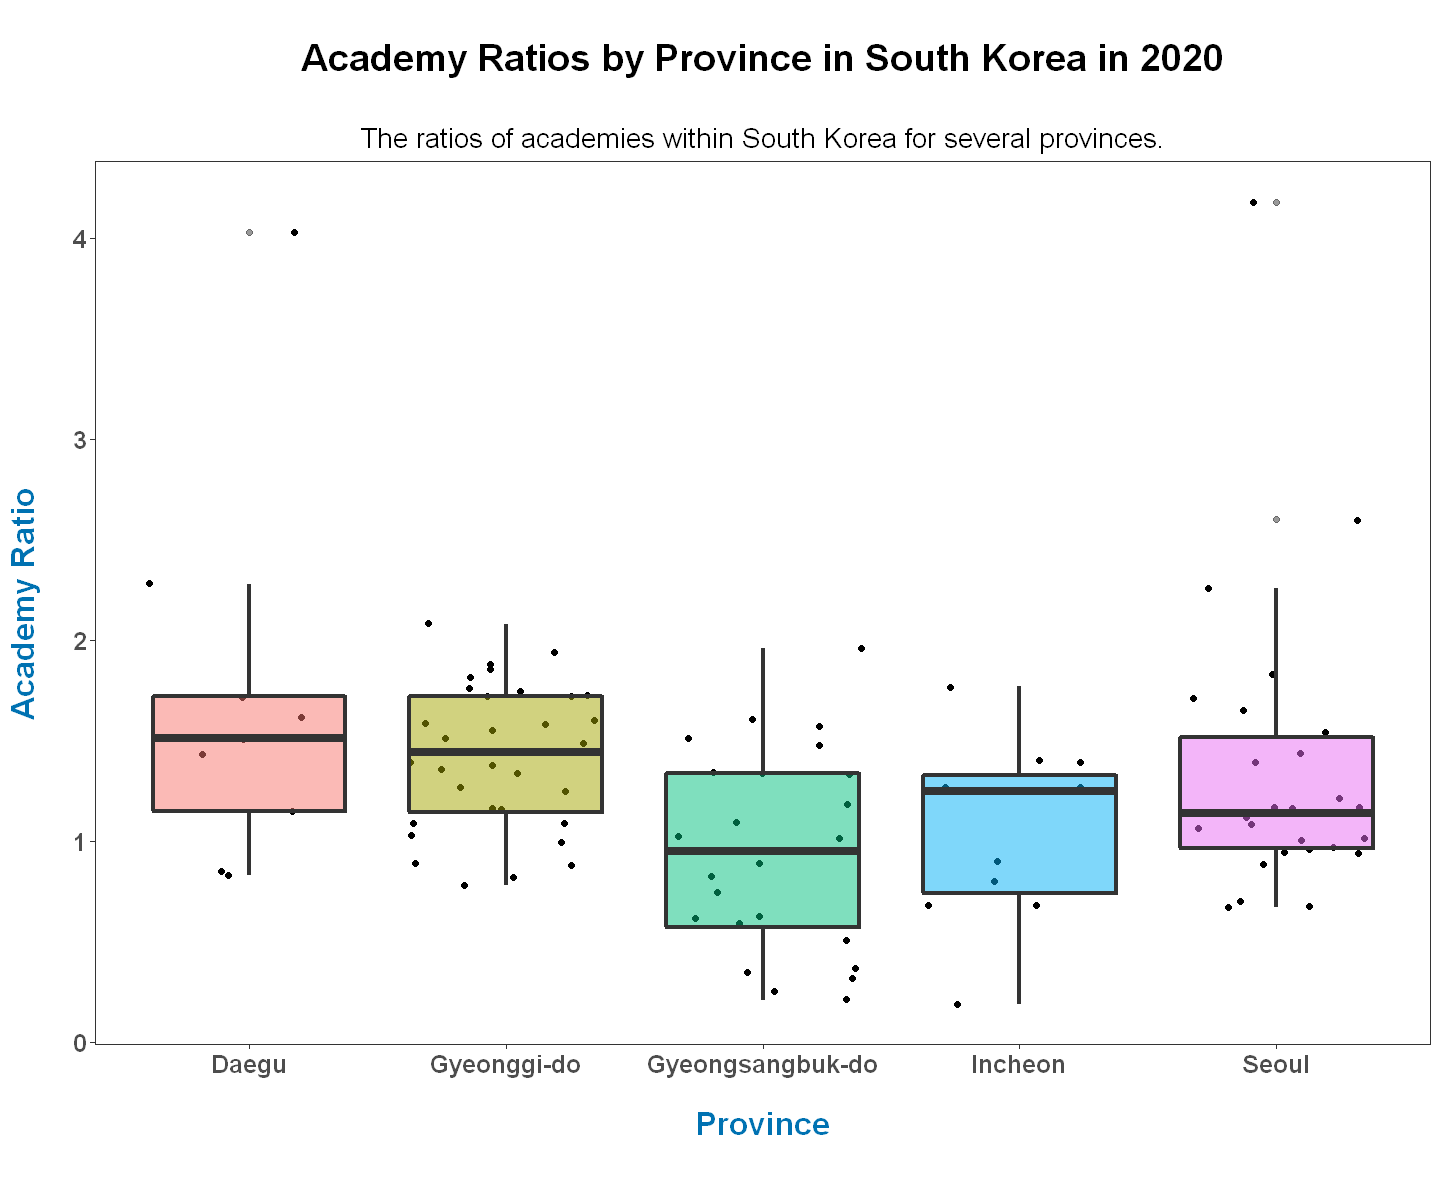

In [15]:
options(repr.plot.width=12, repr.plot.height=10)

colourblind_palette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442")

academy_ratio_plot <- ggplot(academy_ratios, aes(x=province, y=academy_ratio))

academy_ratio_plot + geom_jitter() + geom_boxplot(size=1.2, alpha=0.5, aes(fill=province)) +

labs(title='Academy Ratios by Province in South Korea in 2020',
     subtitle='The ratios of academies within South Korea for several provinces.',
     x='Province',
     y='Academy Ratio') +

theme_bw() +

scale_color_manual(values = colourblind_palette) +

theme(plot.title = element_text(size=22, face="bold", lineheight=1.5, margin=margin(20, 10, 30, 0), hjust=0.5),
      plot.subtitle = element_text(size=17, lineheight=1.5, hjust=0.5),
      axis.title.x = element_text(size=19, margin=margin(20, 0, 30, 0), color="#0072b2", face="bold"),
      axis.title.y = element_text(size=19, margin=margin(0, 20, 0, 0), color="#0072b2", face="bold"),
      axis.text.x = element_text(size=15, face="bold"),
      axis.text.y = element_text(size=15, face="bold"),
      legend.position="none",
      legend.title = element_text(size=17, face="bold", margin=margin(0, 0, 10, 0)),
      legend.text = element_text(size=14),
      legend.key.size = unit(1.5, "cm"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank()
     )

### 2.2. Correlation of Data
To show correlations between attributes, a correlation matrix was created. Since correlation using ggcorr is only suited for continuous data, the Region.csv file was used for it.

Some attributes were dropped because they were not relevant/not numeric.

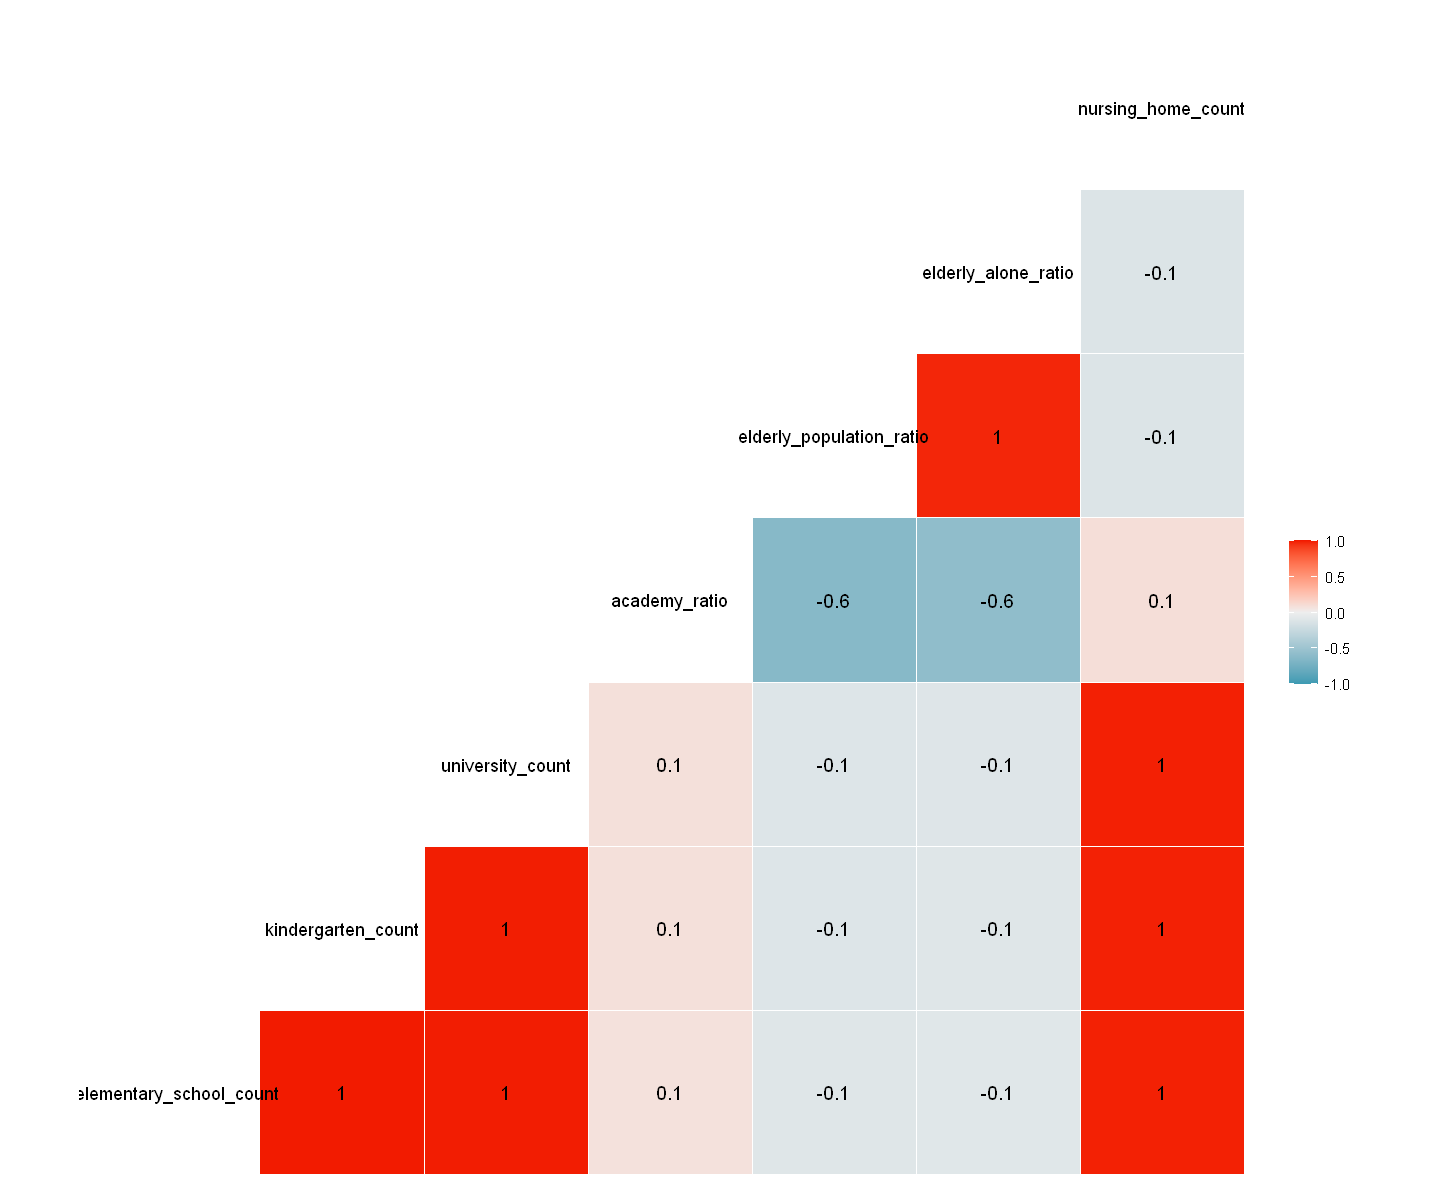

In [16]:
regions_subset = subset(regions_df, select = -c(province_code, province, city, latitude, longitude))
ggcorr(regions_subset, palette = "RdBu", label = TRUE)

There is a very high correlation between the amount of elementary schools, kindergartens and nursing homes, which makes sense as the bigger a province is, the more it will have of each.

## 3. Charts for Story
This section will go through generating 4 graphs for the story, to show how COVID-19 affected South Korea.

## What is the Story?
The story is how COVID-19 affected South Korea in 2020. South Korea is known as one of the countries that handled the pandemic the best, but there were still many cases and many people infected. As mentioned before, the data only goes up to the end of June 2020 so it shows how COVID-19 affected South Korea in the early stages of the pandemic.

The following charts will reflect COVID-19's impact on South Korea. The number of cases by region, the fluctuation of cases over a monthly period, the reasons for infection and the most prominent ages and sexes affected. 

### 3.1. Regions with Highest Confirmed Cases
To get an overview of how COVID-19 affected South Korea in the early months of the pandemic, a bar chart was generated to compare the top regions with the highest number of confirmed cases. The reason it is limited to 200 cases per region is to avoid overwhelming the user with data. Korean region names can be very long and complex to non-natives so it seemed ideal to only retrieve a select few number of regions with a certain amount of cases.

The chart will show us the number of cases for these regions as well as the epicenter of the outbreak.

### Chart Type
The chart is a bar chart. The reason for using a bar chart is because it is ideal for comparing categorical attributes, in this case, regions. They are effective, intuitive to analyse and easily readable for the user if it is implemented well.

The regions and number of cases are placed in a dataframe and then filtered so that only regions with > 200 cases are used for the chart. 

In [17]:
# Placing regions and number of cases in dataframe
cases_by_province <- sqldf('select province, sum(confirmed_cases) as total_confirmed from cases_df
                          group by province order by total_confirmed desc')

# Filtering regions with cases > 200
cases_by_province <- sqldf('select * from cases_by_province where total_confirmed > 200')

The chart is then plotted. The viridis library is used to pick a colourblind-friendly colourmap that provides a gradient for the bars based on the number of confirmed cases. The bars were reordered as well highest to lowest. Labels for each bar showing the amount of cases were added for further clarity.

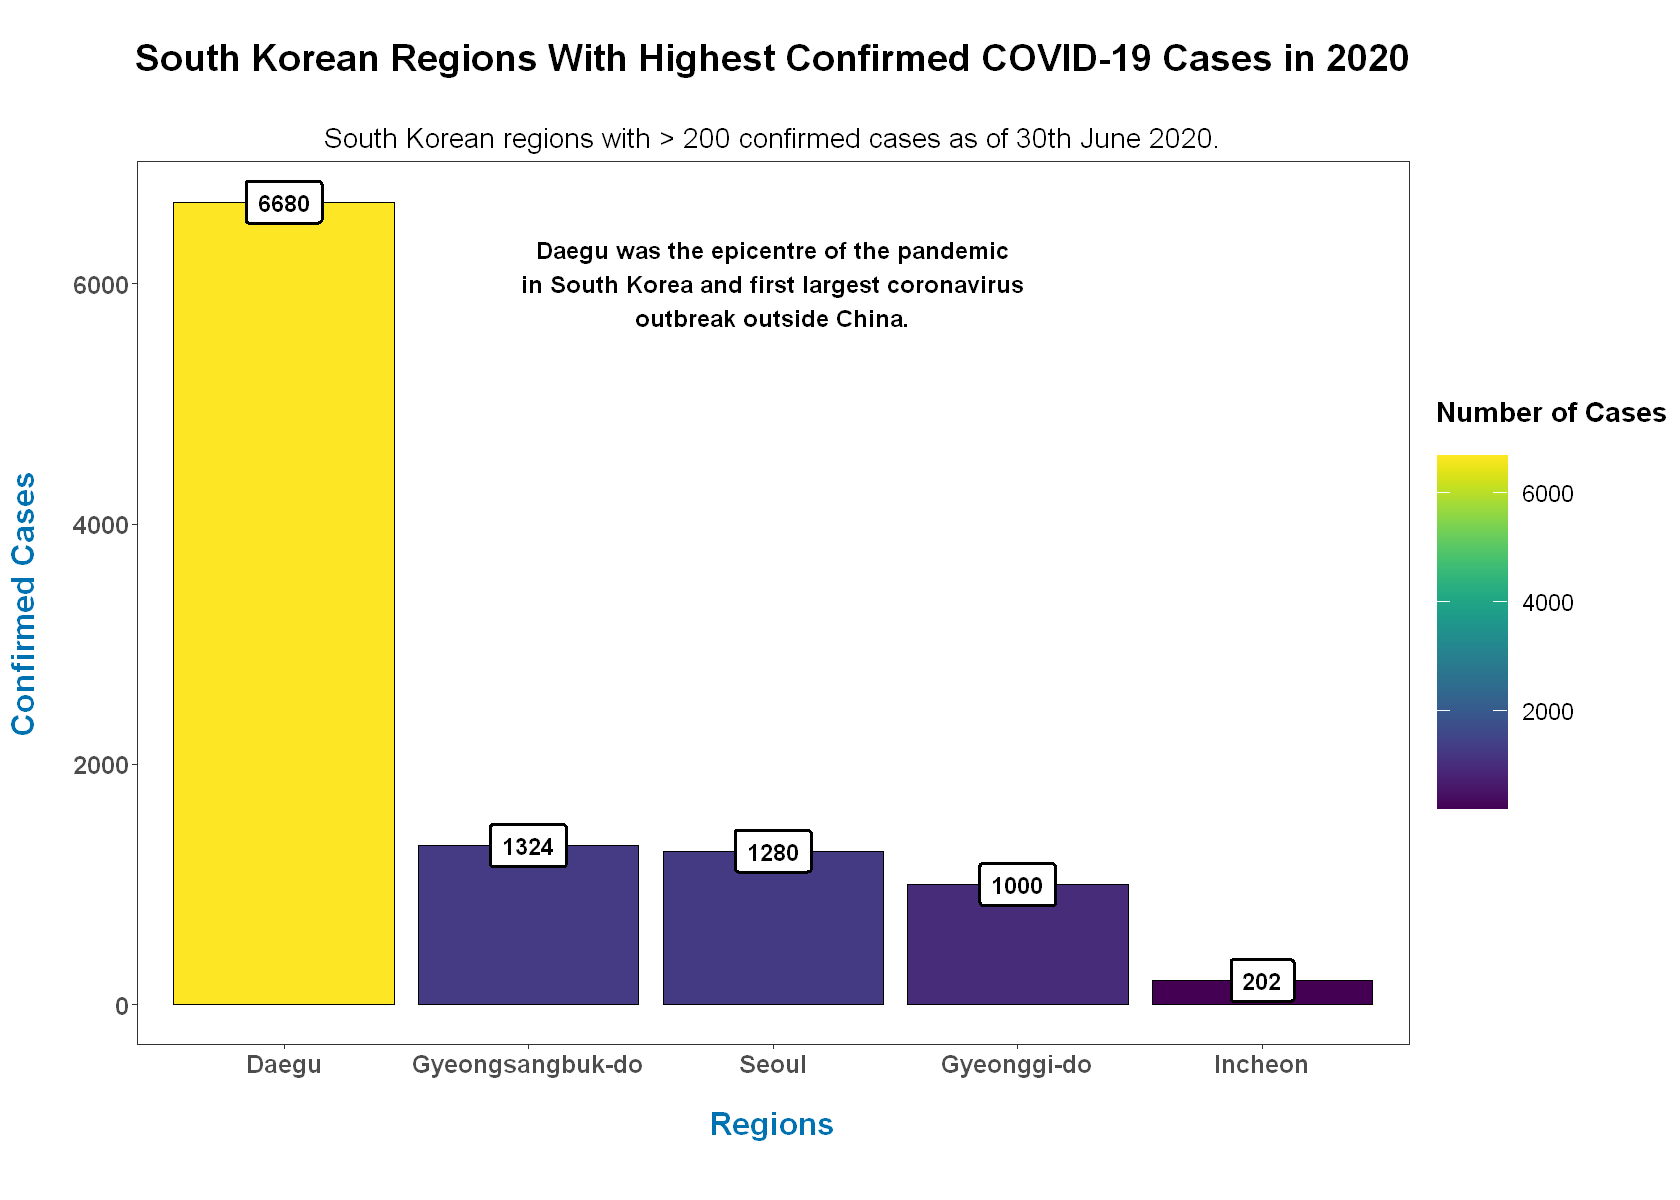

In [18]:
# Changes height and width of the chart
options(repr.plot.width=14, repr.plot.height=10)

cases_plot <- ggplot(data=cases_by_province, aes(x=reorder(province, -total_confirmed), y=total_confirmed))

# Stat is identity so that y-axis values could be entered manually
cases_plot + geom_bar(aes(fill=total_confirmed), stat='identity', color='black') + 

labs(title='South Korean Regions With Highest Confirmed COVID-19 Cases in 2020',
     subtitle='South Korean regions with > 200 confirmed cases as of 30th June 2020.',
     x='Regions',
     y='Confirmed Cases',
     fill='Number of Cases') +

# Provides colourblind-friendly palette and gradient
scale_fill_viridis() +

# Label for confirmed case numbers
geom_label(aes(label=total_confirmed),
           label.padding = unit(0.5, "lines"),
           label.size = 1,
           size=5,
           color = "black",
           fill="white",
           fontface=2) +

annotate("text", label = "Daegu was the epicentre of the pandemic\n in South Korea and first largest coronavirus \noutbreak outside China.", x = 3, y = 6000, size=5, fontface=2) +

# Remove gray background
theme_bw() +

theme(plot.title = element_text(size=22, face="bold", lineheight=1.5, margin=margin(20, 10, 30, 0), hjust=0.5),
      plot.subtitle = element_text(size=17, lineheight=1.5, hjust=0.5),
      axis.title.x = element_text(size=19, margin=margin(20, 0, 30, 0), color="#0072b2", face="bold"),
      axis.title.y = element_text(size=19, margin=margin(0, 20, 0, 0), color="#0072b2", face="bold"),
      axis.text.x = element_text(size=15, face="bold"),
      axis.text.y = element_text(size=15, face="bold"),
      legend.title = element_text(size=17, face="bold", margin=margin(0, 0, 10, 0)),
      legend.text = element_text(size=14),
      legend.key.size = unit(1.5, "cm"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank()
     )

Based on this chart, we can see that Daegu has the highest number of cases in South Korea as of mid-2020. The reason Daegu had such a high number of cases compared to other, even more populated regions is because Daegu had the largest coronavirus outbreak outside of China (Source: https://www.weforum.org/agenda/2020/04/south-korean-daegu-china-coronavirus-covid19-cases-virus/)

### 3.2. Confirmed Cases Over Time

It is useful to see how much cases increased over time in South Korea. This chart will involve time series data. Time series data can be complicated to plot due to having formatting dates first. To help with this, I used the lubridate package to format the date as Date rather than character. ggplot can only plot time series data nicely if its of type Date.

### Chart Type
I used an area graph for the chart. The reason for this is because area graphs are very effective at conveying the rise and fall of quantitative data over a period of time. You can see how much cases have increased by month by month.  

In [19]:
# Using lubridate to format the date properly as Date object
time_df$date <- ymd(time_df$date)

The dates and number of confirmed cases for each date were taken from the Time.csv file and placed in a dataframe. 

For the labels, the results were filtered for dates matching the first of each month (from March) and the very last date (30th June). This is just to make it easier to plot the labels at the right spots. It would not be useful to place labels before March as there were very few cases then.

In [20]:
cases_over_time <- sqldf('select date, confirmed as confirmed_cases from time_df')

outbreak_cases_no <- sqldf(paste('select date, confirmed_cases from cases_over_time where date = ', 
                                 sprintf("%d", as.Date("2020-03-01", "%Y-%m-%d")), ' or date = ', 
                                 sprintf("%d", as.Date("2020-04-01", "%Y-%m-%d")), ' or date = ',
                                 sprintf("%d", as.Date("2020-05-01", "%Y-%m-%d")), ' or date = ',
                                 sprintf("%d", as.Date("2020-06-01", "%Y-%m-%d")), ' or date = ',
                                 sprintf("%d", as.Date("2020-06-30", "%Y-%m-%d"))))

The plot is then charted which uses much of the same code for the previous chart. 

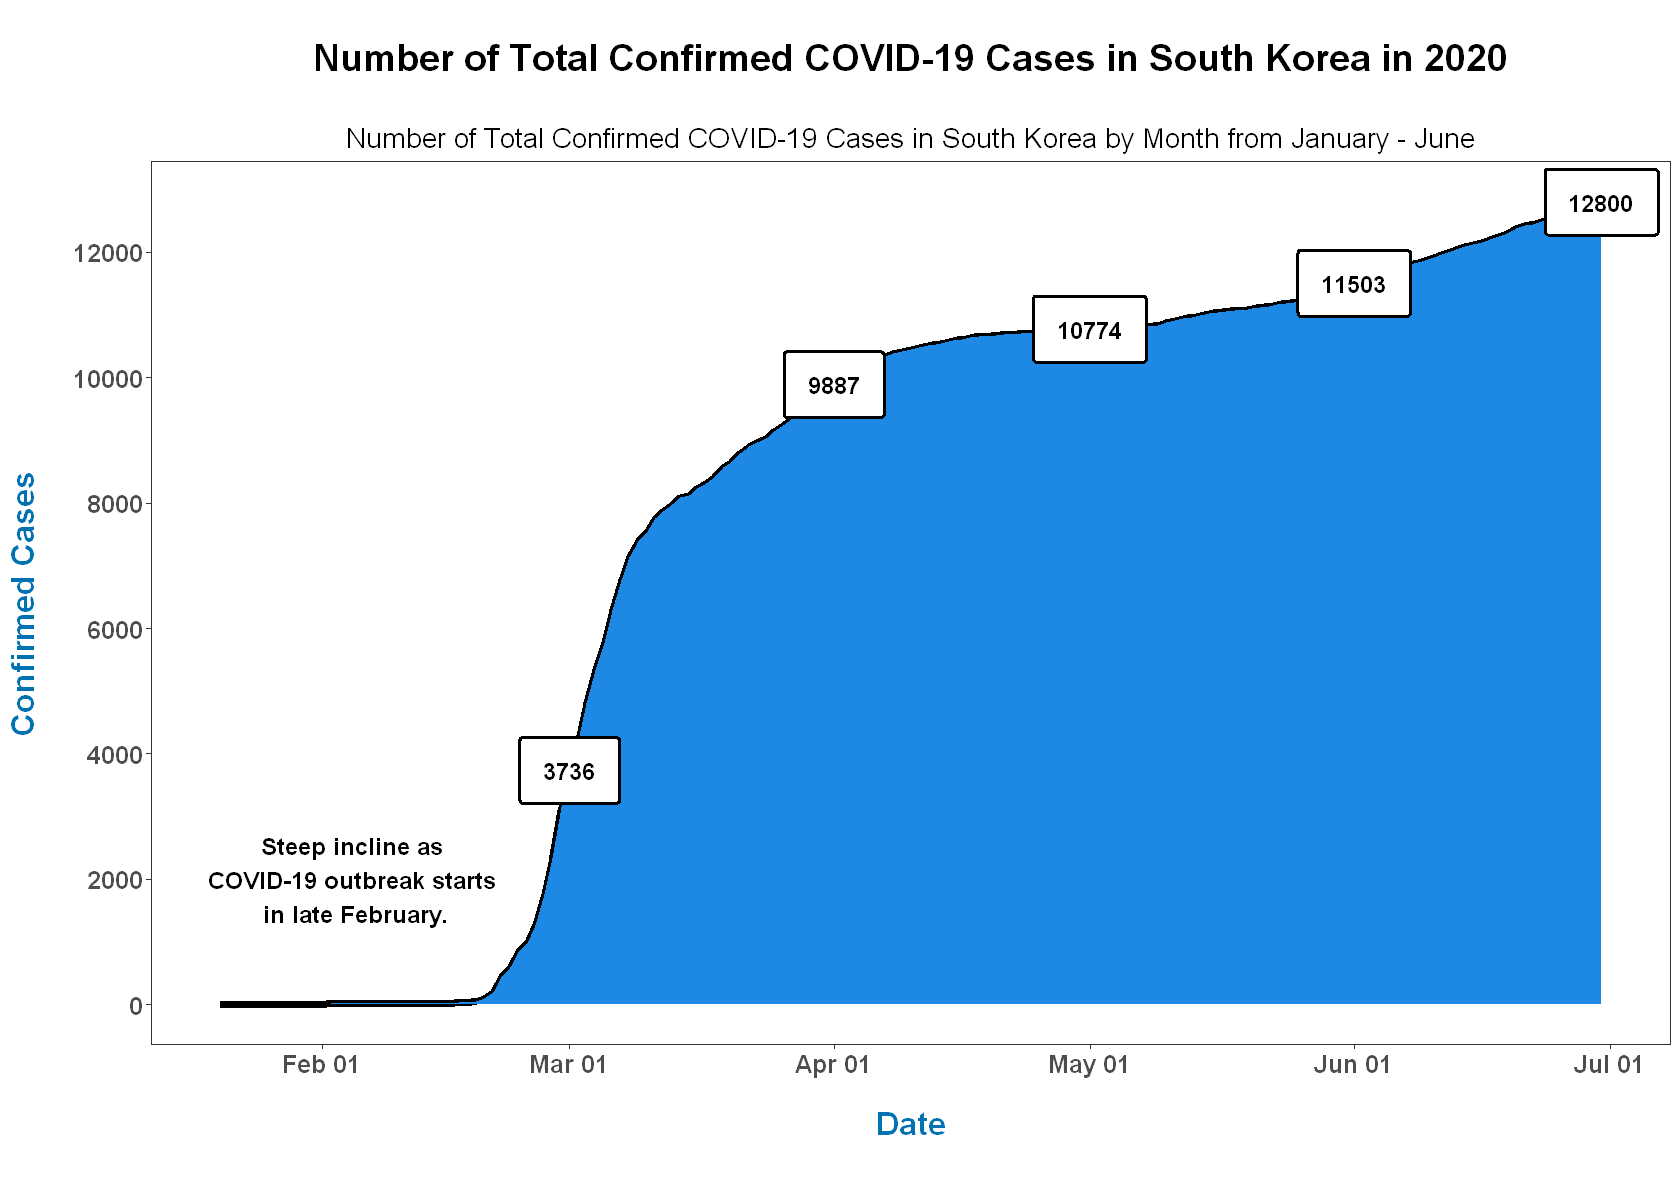

In [21]:
options(repr.plot.width=14, repr.plot.height=10)

cases_over_time <- sqldf('select date, confirmed as confirmed_cases from time_df')

# group = 1 is a dummy value to override the default behaviour of grouping by the x variable
cases_over_time_plot <- ggplot(data=cases_over_time, aes(x=date, y=confirmed_cases, group=1))

cases_over_time_plot + geom_line(size=2) + geom_area(fill="#1E88E5") + 

labs(title='Number of Total Confirmed COVID-19 Cases in South Korea in 2020',
     subtitle='Number of Total Confirmed COVID-19 Cases in South Korea by Month from January - June',
     x='Date',
     y='Confirmed Cases') +

# Make dates appear as month and day
scale_x_date(date_labels = '%b %d') +

scale_y_continuous(breaks = seq(0, 12000, by = 2000)) +

geom_label(data=outbreak_cases_no,
           aes(label=confirmed_cases, x=date, y=confirmed_cases),
           label.padding = unit(1, "lines"),
           label.size = 1,
           size=5,
           color = "black",
           fill="white",
           fontface=2) +

# Adds text to the chart
annotate("text", label="Steep incline as \nCOVID-19 outbreak starts \nin late February.", 
         x = as.Date('2020-02-05'), y = 2000, size=5, fontface=2) +

theme_bw() +

theme(plot.title = element_text(size=22, face="bold", lineheight=1.5, margin=margin(20, 10, 30, 0), hjust=0.5),
      plot.subtitle = element_text(size=17, lineheight=1.5, hjust=0.5),
      axis.title.x = element_text(size=19, margin=margin(20, 0, 30, 0), color="#0072b2", face="bold"),
      axis.title.y = element_text(size=19, margin=margin(0, 20, 0, 0), color="#0072b2", face="bold"),
      axis.text.x = element_text(size=15, face="bold"),
      axis.text.y = element_text(size=15, face="bold"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank()
     )

This chart gives us an idea of how quickly the cases increased throughout each month. The COVID-19 outbreak started around late February and increased steeply throughout March, steadily increasing through the following months, culminating in 12800 confirmed cases as of 30th June 2020. The spread drops down to only a few hundred cases per day past March, showing that South Korea's rapid action to contain the spread was working. 

### 2.3.  Infection Methods
It is ideal to know the ways in which people were infected which is the purpose for the next chart. It will display what the most common ways of spreading the virus are.

### Chart Type
The chart used is another bar chart. The reason for this is because I am comparing categorical attribute values again, the reason for infection. It is great for seeing the most common reasons for infection in South Korea quickly and easily, judging from the data given.

### Missing Data Issue
Unfortunately, many of the attributes in the Patient.CSV file has missing data. 919 out 4296 values are blank for the infection_case column. So around 21% is missing values. I decided to drop the rows with missing data as they would not be useful for the chart.

Down below, the reasons people were infected along with the number for each is added to a dataframe and filtered so that only reasons with > 50 cases are shown, as some reasons have very few cases and are not useful.

In [22]:
# Top ways people were infected
infection_methods <- sqldf('select infection_case, count(infection_case) as number from patients_df group by infection_case order by number desc')
infection_methods$infection_case[infection_methods$infection_case == ""] <- NA

# infection_methods

Dropping row with NA by its row number.

In [23]:
# Retrieving ways of infection that are > 50
infection_methods <- sqldf('select * from infection_methods where number > 50')

# Dropping row with NA
infection_methods <- infection_methods[-c(2),]

Plotting the chart below with much of the same code from the previous bar chart. This bar chart was flipped so that more values on the x-axis could be added. 

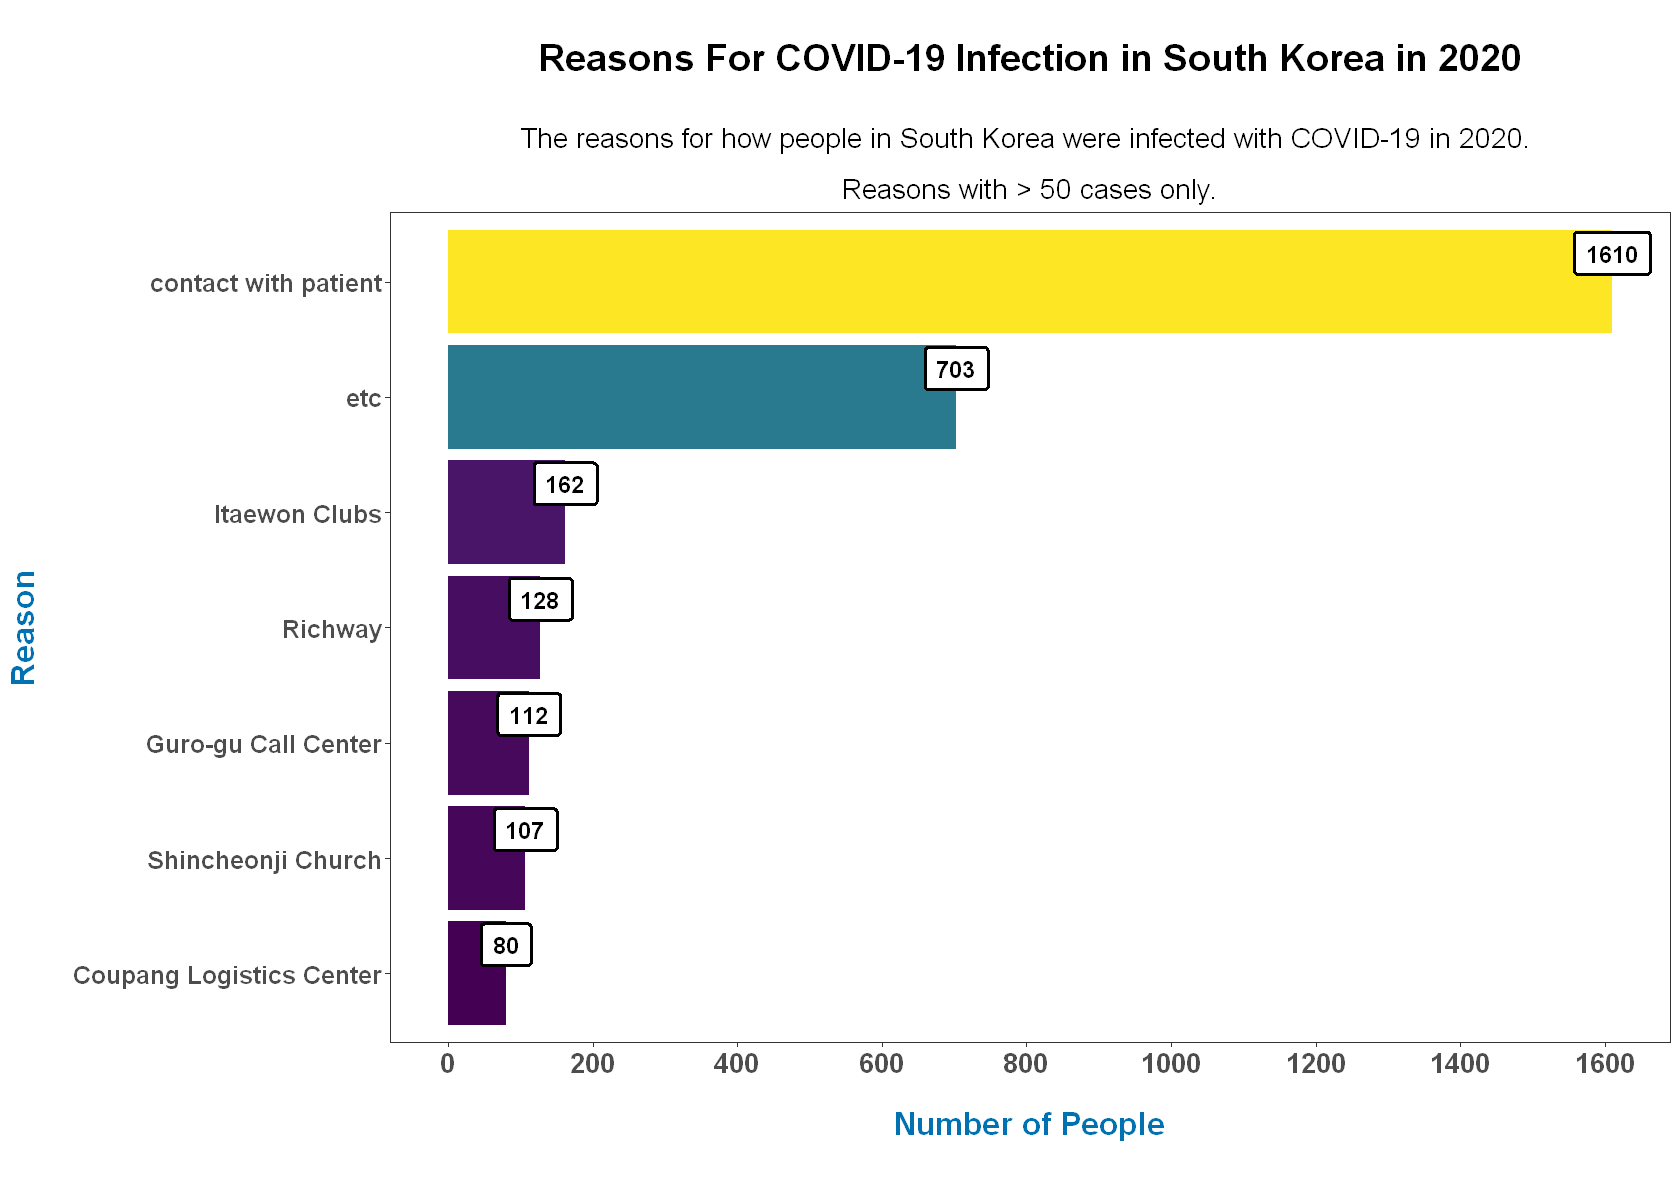

In [24]:
options(repr.plot.width=14, repr.plot.height=10)

infection_methods_plot <- ggplot(data=infection_methods, aes(x=reorder(infection_case, number), y=number))

infection_methods_plot + geom_bar(stat='identity', aes(fill=number)) +

coord_flip() +

scale_y_continuous(breaks = seq(0, 2000, by = 200)) +

labs(title='Reasons For COVID-19 Infection in South Korea in 2020',
     subtitle='The reasons for how people in South Korea were infected with COVID-19 in 2020. \nReasons with > 50 cases only.',
     x='Reason',
     y='Number of People') +

geom_label(aes(label=number),
           label.padding = unit(0.5, "lines"),
           label.size = 1,
           size=5,
           color = "black",
           fill="white",
           fontface=2,
           nudge_x=0.25)  +

scale_fill_viridis() +

theme_bw() +

theme(plot.title = element_text(size=22, face="bold", lineheight=1.5, margin=margin(20, 10, 30, 0), hjust=0.5),
      plot.subtitle = element_text(size=17, lineheight=1.5, hjust=0.5),
      axis.title.x = element_text(size=19, margin=margin(20, 0, 30, 0), color="#0072b2", face="bold"),
      axis.title.y = element_text(size=19, margin=margin(0, 20, 0, 0), color="#0072b2", face="bold"),
      axis.text.x = element_text(size=16, face="bold"),
      axis.text.y = element_text(size=15, face="bold"),
      legend.position="none",
      panel.grid.major = element_blank(), panel.grid.minor = element_blank()
     )

Many of the cases are caused by coming into contact with a patient and some occurred from being in a place of worship or some kind of center.

Itaewon is a district in Seoul where an outbreak occurred in nightclubs due to one infected 29 year old man visiting them (Source: https://www.aa.com.tr/en/asia-pacific/s-korea-sees-mass-covid-19-cases-linked-to-night-clubs/1838031).

### 2.4. Confirmed Cases by Ages and Sex
Looking at the age and sex of the people afflicted with COVID-19 could shine some light on who are the main carriers and spreaders of COVID-19. It will show which age group was affected the most by it.

### Chart Type
A tile chart was used in this case as it makes it easy to visualise a heatmap for two categorical variables plotted against each other, along with the number of confirmed cases affecting it too.

In [25]:
head(patients_df)

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1e+09,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NA,75,2020-01-22,2020-01-23,2020-02-05,NA,released
2,1e+09,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NA,31,NA,2020-01-30,2020-03-02,NA,released
3,1e+09,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NA,2020-01-30,2020-02-19,NA,released
4,1e+09,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NA,9,2020-01-26,2020-01-30,2020-02-15,NA,released
5,1e+09,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NA,2020-01-31,2020-02-24,NA,released
6,1e+09,female,50s,Korea,Seoul,Jongno-gu,contact with patient,1000000003,43,NA,2020-01-31,2020-02-19,NA,released


Adding sex, age and number of people grouped by age and sex to a dataframe. NA values were dropped as they would not be able to plotted. To plot the attributes correctly, I converted sex and age to factors rather than leaving them as characters. 

In [26]:
patient_ages <- sqldf('select sex, age, count(age) as number from patients_df group by age, sex')

patient_ages <- patient_ages %>% drop_na()

patient_ages$sex <- as.factor(patient_ages$sex)

patient_ages$age <- as.factor(patient_ages$age)

# sum(is.na(patient_ages))

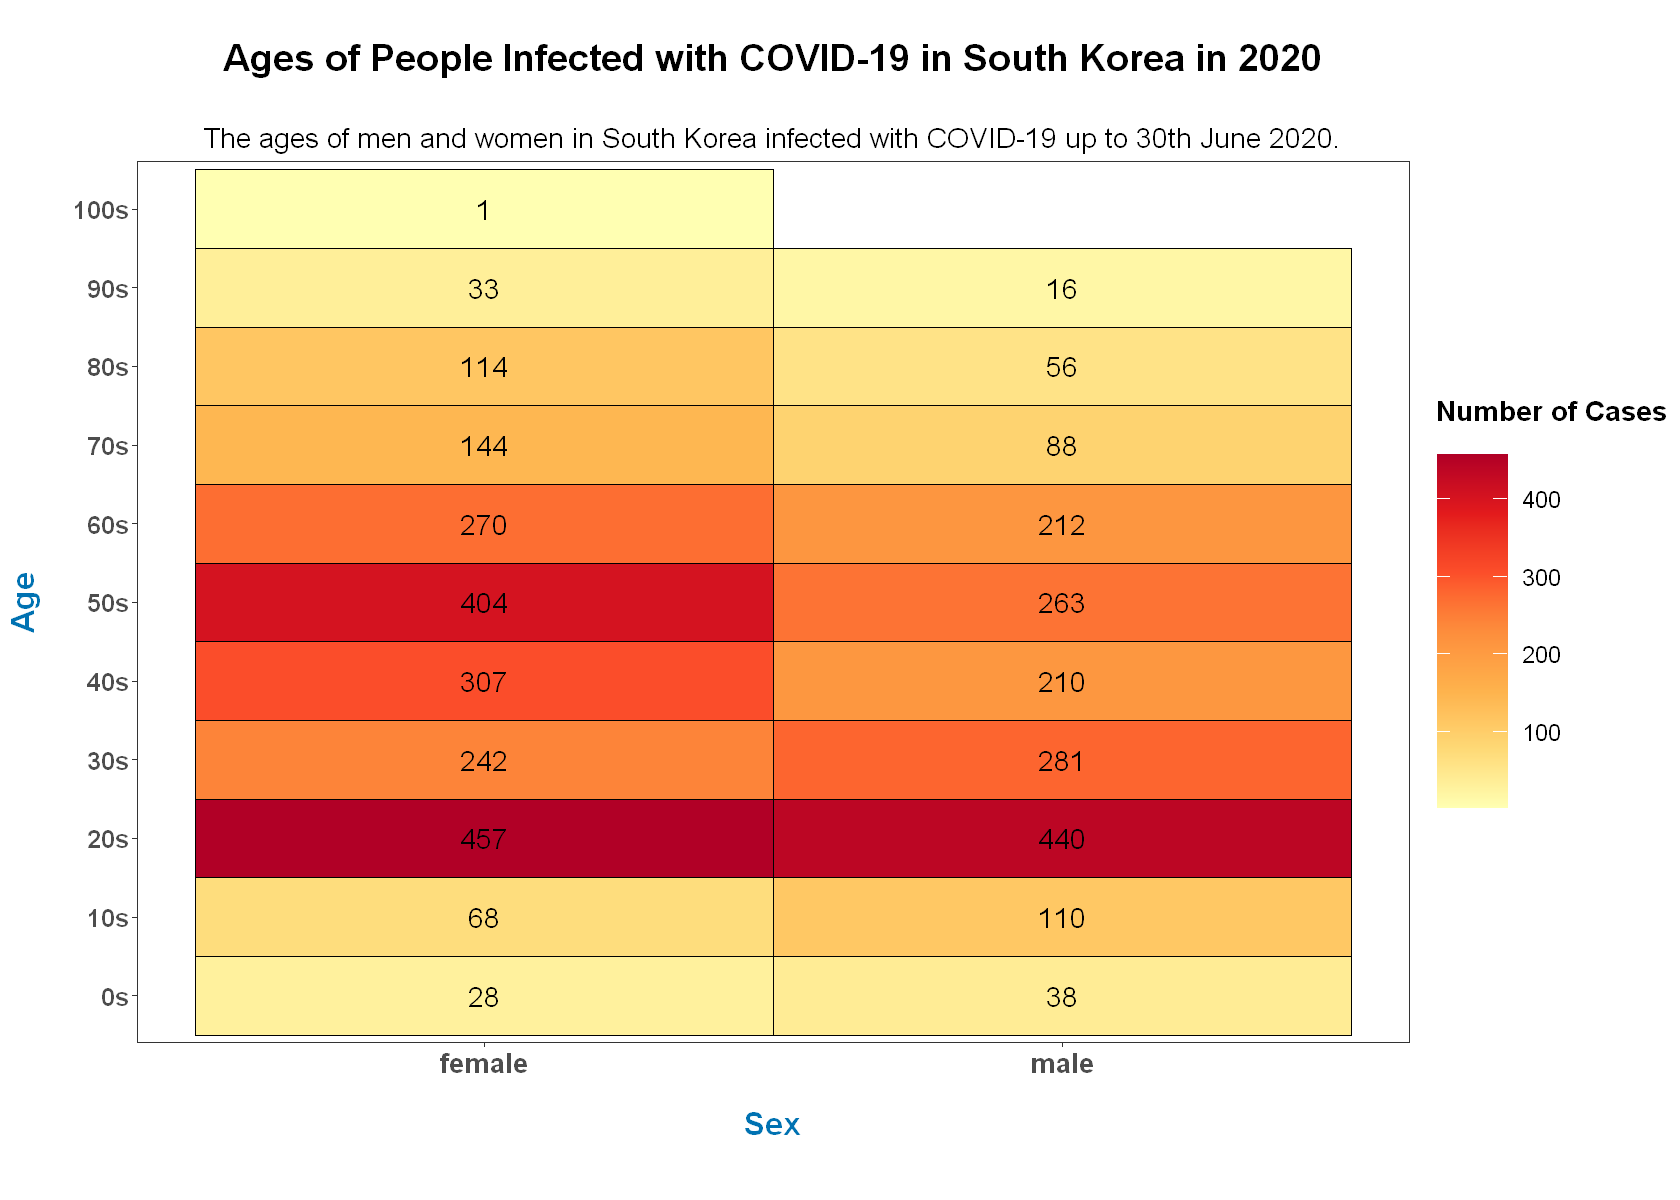

In [27]:
ggplot(patient_ages, aes(x=sex, y=age)) + geom_tile(aes(fill=number), color="black") +

scale_y_discrete(limit = c("0s", "10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "100s")) +

labs(title='Ages of People Infected with COVID-19 in South Korea in 2020',
     subtitle='The ages of men and women in South Korea infected with COVID-19 up to 30th June 2020.',
     x='Sex',
     y='Age',
     fill='Number of Cases') +

scale_fill_distiller(palette="YlOrRd", direction=1) +

geom_text(aes(label=number), size=6) +

theme_bw() +

theme(plot.title = element_text(size=22, face="bold", lineheight=1.5, margin=margin(20, 10, 30, 0), hjust=0.5),
      plot.subtitle = element_text(size=17, lineheight=1.5, hjust=0.5),
      axis.title.x = element_text(size=19, margin=margin(20, 0, 30, 0), color="#0072b2", face="bold"),
      axis.title.y = element_text(size=19, margin=margin(0, 20, 0, 0), color="#0072b2", face="bold"),
      axis.text.x = element_text(size=16, face="bold"),
      axis.text.y = element_text(size=15, face="bold"),
      legend.title = element_text(size=17, face="bold", margin=margin(0, 0, 10, 0)),
      legend.text = element_text(size=14),
      legend.key.size = unit(1.5, "cm"),
      panel.grid.major = element_blank(), panel.grid.minor = element_blank()
     )

The majority of cases appear to be men and women in their 20s. Very young and very old people are less likely to be infected by COVID-19. People in the their 20s - 60s are more likely to be out and working where they are susceptible to COVID-19 as they may be surrounded by others more often.

## Conclusion To Story

These charts should give an indication of the impact of COVID-19 on South Korea in the early stages. It is interesting to examine how many people were infected and the way in which they were infected, as much as the data allows. It is unfortunately not up-to-date and the total number of cases there are ~118,000 at time of writing but seeing how much it was impacted early on before it got it under control better was the whole story.